In [1]:
from Dissects.skel import Skel
from Dissects.utils import clean_skeleton

import os
from skimage import io
import numpy as np
import pandas as pd
import copy
import sys
import matplotlib.pyplot as plt
sys.setrecursionlimit(10000)




In [2]:
# directory='/home/admin-suz/Documents/testCellSeg/TestSPIM/'
# # import image
# skeleton = Skel(os.path.join(directory,'C1-20191112_SQHrfp-EcadGFP_DLG647_180degre_04-1.fits_c100.up.NDskl.a.NDskl'))

directory='/home/admin-suz/Documents/testCellSeg/Test1/'
skeleton = Skel(os.path.join(directory,'im_bin4_3d.fits_c1e+03.up.NDskl.a.NDskl'))

if skeleton.isValid():
    skeleton.write_vtp(os.path.join(directory, "image_original.vtp"))
else:
    raise nameError('skeleton not valid')   
    
# lecture de l'image tif, pour récupérer le ratio depth/xy pixel

reading: 3763 critical points
reading: 3648 filaments
reading: critical points data
critical points done
reading: filaments data
Writing skeleton vtp file /home/admin-suz/Documents/testCellSeg/Test1/image_original.vtp 



In [3]:
clean_skeleton(skeleton)

Writing skeleton vtp file /home/admin-suz/Documents/testCellSeg/Test1/im_bin4_3d.fits_c1e+03.up.NDskl.a.NDskl/_removefil.vtp 



In [4]:
data_crit = []

for c in skeleton.crit:
    data_crit.append(
        {
            "id":c,
            "x": c.pos[0],
            "y": c.pos[1],
            "z": c.pos[2] * 0.22/0.18,
            "n_fil": c.nfil,
            "val": int(c.val),
            "pair": c.pair,
            "type":int(c.typ),
            "destCritId_addr":c.destCritId,
            "filId":c.filId,
        }
    )

data_crit = pd.DataFrame.from_records(data_crit)
tmp_id = []
for ci in data_crit['destCritId_addr'].values:
    tmp=[]
    for c in ci:
        tmp.append(data_crit[data_crit['id']==c].index.to_numpy()[0])
        
    tmp_id.append(tmp)

data_crit['destCritId'] = tmp_id
data_crit.head()

,id,x,y,z,n_fil,val,pair,type,destCritId_addr,filId,destCritId
0,<Dissects.skel.CriticalPoint object at 0x7f92a...,312.0,46.0,11.0,2,4184,<Dissects.skel.CriticalPoint object at 0x7f92a...,3,[<Dissects.skel.CriticalPoint object at 0x7f92...,[<Dissects.skel.Filament object at 0x7f92a63b7...,"[906, 922]"
1,<Dissects.skel.CriticalPoint object at 0x7f92a...,307.0,47.0,11.0,2,3441,<Dissects.skel.CriticalPoint object at 0x7f92a...,3,[<Dissects.skel.CriticalPoint object at 0x7f92...,[<Dissects.skel.Filament object at 0x7f92a63b7...,"[907, 922]"
2,<Dissects.skel.CriticalPoint object at 0x7f92a...,336.0,49.0,11.0,2,10609,<Dissects.skel.CriticalPoint object at 0x7f92a...,3,[<Dissects.skel.CriticalPoint object at 0x7f92...,[<Dissects.skel.Filament object at 0x7f92a63b7...,"[908, 909]"
3,<Dissects.skel.CriticalPoint object at 0x7f92a...,261.0,140.0,11.0,3,10965,<Dissects.skel.CriticalPoint object at 0x7f92a...,3,[<Dissects.skel.CriticalPoint object at 0x7f92...,[<Dissects.skel.Filament object at 0x7f92a63b7...,"[914, 915, 949]"
4,<Dissects.skel.CriticalPoint object at 0x7f92a...,259.0,142.0,11.0,2,9023,<Dissects.skel.CriticalPoint object at 0x7f92a...,3,[<Dissects.skel.CriticalPoint object at 0x7f92...,[<Dissects.skel.Filament object at 0x7f92a63b7...,"[915, 950]"


In [5]:
data_fil = []

for f in skeleton.fil:
    data_fil.append(
        {
            "id":f,
            "cp1_add": f.cp1,
            "cp2_add": f.cp2,
            "cp1": data_crit[data_crit['id']==f.cp1].index.to_numpy()[0],
            "cp2": data_crit[data_crit['id']==f.cp2].index.to_numpy()[0],
            "points": f.points
            
        }
    )

data_fil = pd.DataFrame.from_records(data_fil)
data_fil.head()

,id,cp1_add,cp2_add,cp1,cp2,points
0,<Dissects.skel.Filament object at 0x7f92a63aef90>,<Dissects.skel.CriticalPoint object at 0x7f92a...,<Dissects.skel.CriticalPoint object at 0x7f92a...,905,5,"[[254.0, 152.5, 8.0], [254.0, 151.5, 8.0], [25..."
1,<Dissects.skel.Filament object at 0x7f92a63aee90>,<Dissects.skel.CriticalPoint object at 0x7f92a...,<Dissects.skel.CriticalPoint object at 0x7f92a...,905,6,"[[254.0, 152.5, 8.0], [254.0, 153.5, 8.5], [25..."
2,<Dissects.skel.Filament object at 0x7f92a63aef10>,<Dissects.skel.CriticalPoint object at 0x7f92a...,<Dissects.skel.CriticalPoint object at 0x7f92a...,906,11,"[[315.5, 47.0, 9.0], [316.5, 47.0, 9.0], [317...."
3,<Dissects.skel.Filament object at 0x7f92a63b7110>,<Dissects.skel.CriticalPoint object at 0x7f92a...,<Dissects.skel.CriticalPoint object at 0x7f92a...,906,0,"[[315.5, 47.0, 9.0], [314.5, 46.5, 9.0], [313...."
4,<Dissects.skel.Filament object at 0x7f92a63b71d0>,<Dissects.skel.CriticalPoint object at 0x7f92a...,<Dissects.skel.CriticalPoint object at 0x7f92a...,907,1,"[[301.5, 49.0, 9.0], [302.5, 49.0, 9.0], [303...."


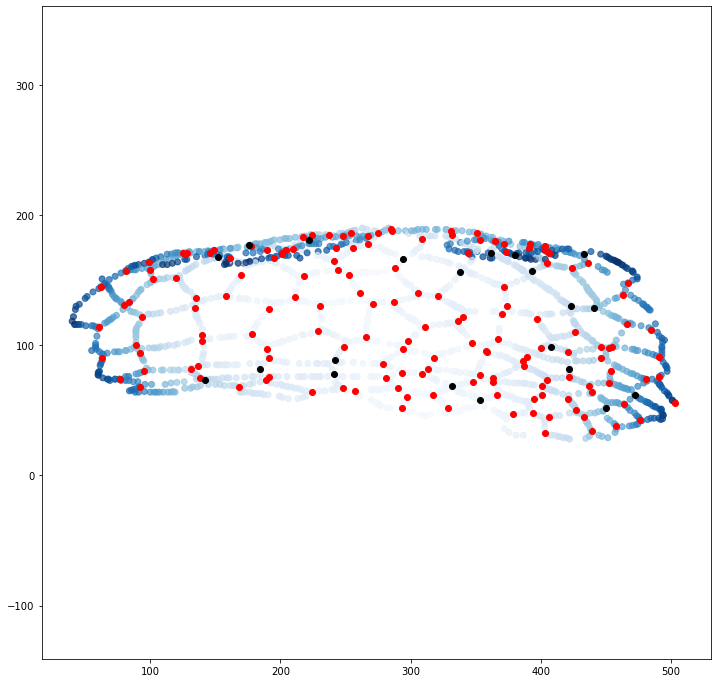

In [6]:
fig, ax = plt.subplots()

ax.scatter(data_crit.x, data_crit.y, c=data_crit.z, cmap='Blues', alpha=0.7)

#ax.scatter(data_crit.loc[[0,3]]['x'], data_crit.loc[[0,3]]['y'], color='red')

data_crit_2 = data_crit[data_crit.n_fil==3]
ax.scatter(x=data_crit_2['x'],
            y=data_crit_2['y'],
           color= 'red')

data_crit_2 = data_crit[data_crit.n_fil>3]
ax.scatter(x=data_crit_2['x'],
            y=data_crit_2['y'],
           color= 'black')

ax.axis('equal')

# ax.set_xlim(300, 400)
# ax.set_ylim(50, 100)
fig.set_size_inches(12, 12)


In [7]:
import ipyvolume as ipv
from matplotlib import cm
data=data_crit.copy()
cmap = cm.get_cmap("viridis")
colors = cmap((data.z-data.z.min())/(data.z.max()-data.z.min()))

ipv.clear()
ipv.scatter(x=np.array(data.x)*10, y=np.array(data.y)*10, z=data.z*10, size=1, color=colors, marker='circle_2d')
ipv.squarelim()
ipv.show()

In [20]:
from itertools import chain

x=[]
y=[]
z=[]
for fp in data_fil.points:
    x.append(list(fp.flatten()[0::3]))
    y.append(list(fp.flatten()[1::3]))
    z.append(list(fp.flatten()[2::3]))
x = list(chain.from_iterable(x))
y = list(chain.from_iterable(y))
z = list(chain.from_iterable(z))

x = list(map(int, x))
y = list(map(int, y))
z = list(map(int, z))


import plotly.graph_objects as go

data1 = go.Scatter3d(x=data_crit.x,
                      y=data_crit.y,
                      z=data_crit.z,
                      mode='markers',
                     marker=dict(
                        size=1,
                        color='black',                # set color to an array/list of desired values
                        colorscale='Viridis',   # choose a colorscale
                        opacity=0.8
                     )
    )

data0 = go.Scatter3d(x=x,
                      y=y,
                      z=z,
                      mode='markers',
                     marker=dict(
                        size=1,
                        color=z,                # set color to an array/list of desired values
                        colorscale='Viridis',   # choose a colorscale
                        opacity=0.8
                     )
    )

data_crit_2 = data_crit[data_crit.n_fil>2]

data2 = go.Scatter3d(x=data_crit_2['x'].astype(int),
                      y=data_crit_2['y'].astype(int),
                      z=data_crit_2['z'].astype(int),
                      mode='markers',
                     marker=dict(
                        size=2,
                        color='red',                # set color to an array/list of desired values
                        colorscale='Viridis',   # choose a colorscale
                        opacity=0.8
                     )
    )

fig = go.Figure(data=[data0, data1, data2])

fig.update_layout(title='Filament', autosize=False,
                  margin=dict(l=65, r=50, b=65, t=90))

fig['layout'].update(scene=dict(aspectmode="data"))

fig.show()

In [21]:
img0 = io.imread(os.path.join(directory, "image.tif"))
img_output = img0.copy()
img_output = np.where(img_output>0, 0, img_output) 
w = 0
for f in skeleton.fil:
    for p in f.points: 
        if w != 0:
            for z_ in range(int(p[2])-w,int(p[2])+w):
                for y_ in range(int(p[1])-w,int(p[1])+w):
                    for x_ in range(int(p[0])-w,int(p[0])+w):
                        try:
                            img_output[z_][y_][x_]=1
                        except:
                            pass
        else : 
            x_=int(p[0])
            y_=int(p[1])
            z_=int(p[2])
            img_output[z_][y_][x_]=1
#io.imsave('binary_images.tif', img_output)

In [22]:
img0.shape

(86, 201, 525)

In [72]:
from scipy import interpolate

f = interpolate.interp2d(x,y,z, kind='cubic')


/home/admin-suz/miniconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning:

A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=60,24 m=11096 fp=40150414.686598 s=0.000000



In [75]:
xnew = np.arange(min(x), max(x))
ynew = np.arange(min(y), max(y))
znew = f(xnew, ynew)

In [77]:
data0 = go.Scatter3d(x=x,
                      y=y,
                      z=z,
                      mode='markers',
                     marker=dict(
                        size=1,
                        color=z,                # set color to an array/list of desired values
                        colorscale='Viridis',   # choose a colorscale
                        opacity=0.8
                     )
    )

data2 = go.Scatter3d(x=xnew,
                     y=ynew,
                     z=znew[0,:],
                      mode='markers',
                     marker=dict(
                        size=2,
                        color='red',                # set color to an array/list of desired values
                        colorscale='Viridis',   # choose a colorscale
                        opacity=0.8
                     )
    )

fig = go.Figure(data=[data2, data0 ])

fig.update_layout(title='Filament', autosize=False,
                  margin=dict(l=65, r=50, b=65, t=90))

fig['layout'].update(scene=dict(aspectmode="data"))

fig.show()

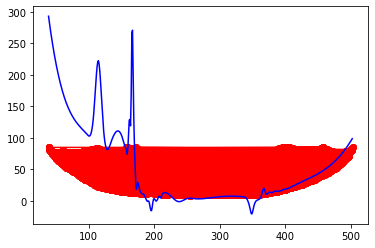

In [87]:
plt.plot(x, z, 'ro-', xnew, znew[10, :], 'b-')
plt.show()